Train dataset image resolution: {(512, 512)}
Checked images: 1992
Train masks dataset image resolution: {(512, 512)}
Checked images: 1992

Showing sample images and masks from the training set:


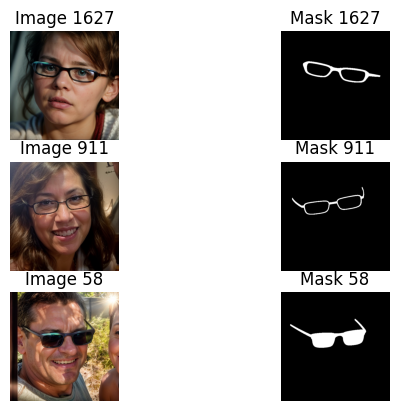

Validation dataset image resolution: {(512, 512)}
Checked images: 489
Validation masks dataset image resolution: {(512, 512)}
Checked images: 489

Showing sample images and masks from the validation set:


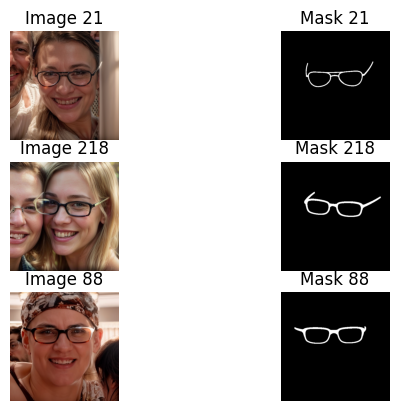

Test dataset image resolution: {(512, 512)}
Checked images: 10
Test masks dataset image resolution: {(512, 512)}
Checked images: 10

Showing sample images and masks from the test set:


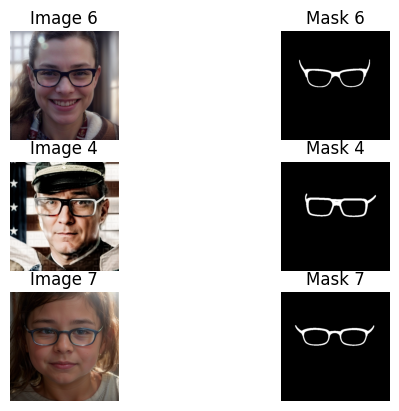

In [4]:
###############
#DATASET PREVIEW AND INSPECTION
################

import os
import cv2
import random
from matplotlib import pyplot as plt

#to understand input model shape let's check
def checkImagesResolution(dir_for_check, image_files):
    resolution_set = set()  

    for image_name in image_files:
        image_path = os.path.join(dir_for_check, image_name)
        image = cv2.imread(image_path)
        resolution_set.add(image.shape[:2])

    return resolution_set

#function to show some samples of dataset images
def display_image_mask_pairs(image_dir, mask_dir, image_files, mask_files, num_pairs=3):
    
    indices = random.sample(range(len(image_files)), num_pairs)
    
    for i, idx in enumerate(indices):
        image_path = os.path.join(image_dir, image_files[idx])
        mask_path = os.path.join(mask_dir, mask_files[idx])
        
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        #Convert from BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        #Show image
        plt.subplot(num_pairs, 2, 2 * i + 1)
        plt.imshow(image_rgb)
        plt.title(f"Image {idx + 1}")
        plt.axis('off')
        
        #Show mask
        plt.subplot(num_pairs, 2, 2 * i + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask {idx + 1}")
        plt.axis('off')
    
    plt.show()

# path to train dataset (relative)
train_image_dir = 'data/train/images'
train_mask_dir = 'data/train/masks'

# path to validation dataset (relative)
val_image_dir = 'data/val/images'
val_mask_dir = 'data/val/masks'

# path to test dataset (relative)
test_image_dir = 'data/test/images'
test_mask_dir = 'data/test/masks'

# getting list of files in dir
train_image_files = sorted(os.listdir(train_image_dir))
train_mask_files = sorted(os.listdir(train_mask_dir))

val_image_files = sorted(os.listdir(val_image_dir))
val_mask_files = sorted(os.listdir(val_mask_dir))

test_image_files = sorted(os.listdir(test_image_dir))
test_mask_files = sorted(os.listdir(test_mask_dir))

#Show train dataset image resolution and amount
print(f"Train dataset image resolution: {checkImagesResolution(train_image_dir, train_image_files)}")
print(f"Checked images: {len(train_image_files)}")

print(f"Train masks dataset image resolution: {checkImagesResolution(train_mask_dir, train_mask_files)}")
print(f"Checked images: {len(train_mask_files)}")

# Show sample images and masks
print("\nShowing sample images and masks from the training set:")
display_image_mask_pairs(train_image_dir, train_mask_dir, train_image_files, train_mask_files)

#Show validation dataset image resolution and amount
print(f"Validation dataset image resolution: {checkImagesResolution(val_image_dir, val_image_files)}")
print(f"Checked images: {len(val_image_files)}")

print(f"Validation masks dataset image resolution: {checkImagesResolution(val_mask_dir, val_mask_files)}")
print(f"Checked images: {len(val_mask_files)}")

# Show sample images and masks
print("\nShowing sample images and masks from the validation set:")
display_image_mask_pairs(val_image_dir, val_mask_dir, val_image_files, val_mask_files)

#Show test dataset image resolution and amount
print(f"Test dataset image resolution: {checkImagesResolution(test_image_dir, test_image_files)}")
print(f"Checked images: {len(test_image_files)}")

print(f"Test masks dataset image resolution: {checkImagesResolution(test_mask_dir, test_mask_files)}")
print(f"Checked images: {len(test_mask_files)}")

# Show sample images and masks
print("\nShowing sample images and masks from the test set:")
display_image_mask_pairs(test_image_dir, test_mask_dir, test_image_files, test_mask_files)

In [5]:
import numpy as np

# Function to load images and masks
# data normalization
def load_images_and_masks(image_dir, mask_dir, image_files, mask_files, convert_to_gray=True):
    images = []
    masks = []
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # Load the image and mask
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Assuming masks are single channel

        # Convert image to grayscale if needed
        if convert_to_gray:
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = np.expand_dims(img, axis=-1)  # Add channel dimension

        # Convert to float32 and normalize
        img = img.astype(np.float32) / 255.0
        mask = mask.astype(np.float32) / 255.0

        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension to mask

        images.append(img)
        masks.append(mask)

    return np.stack(images), np.stack(masks)

# Load training data
x_train, y_train = load_images_and_masks(train_image_dir, train_mask_dir, train_image_files, train_mask_files)

# Load validation data
x_val, y_val = load_images_and_masks(val_image_dir, val_mask_dir, val_image_files, val_mask_files)

# Load test data
x_test, y_test = load_images_and_masks(test_image_dir, test_mask_dir, test_image_files, test_mask_files)

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1992, 512, 512, 1), y_train shape: (1992, 512, 512, 1)
x_val shape: (489, 512, 512, 1), y_val shape: (489, 512, 512, 1)
x_test shape: (10, 512, 512, 1), y_test shape: (10, 512, 512, 1)


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define generators for train and masks data
#also I use augmentation to increase 
image_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

mask_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

2024-06-07 15:27:08.056182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 15:27:08.056390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 15:27:08.154827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-07 15:27:08.354980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 15:27:09.677951: W tensorflow/compiler/tf2

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Dropout

#let's define model
#to solve task of segmentation I choose U-net type model
#and adapted for my dataset and my purposes
def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(96, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Dropout(0.1)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Dropout(0.1)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Mid-level
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Dropout(0.2)(conv3)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv3)
    concat1 = Concatenate()([conv2, up1])
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(concat1)
    conv4 = BatchNormalization()(conv4)
    conv4 = Dropout(0.1)(conv4)

    up2 = UpSampling2D(size=(2, 2))(conv4)
    concat2 = Concatenate()([conv1, up2])
    conv5 = Conv2D(96, 3, activation='relu', padding='same')(concat2)
    conv5 = BatchNormalization()(conv5)
    conv5 = Dropout(0.1)(conv5)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (512, 512, 1) 

# Create the model
model = unet(input_shape)

#model summary (layers, shapes etc)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 96)         960       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 512, 512, 96)         384       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 96)         0         ['batch_normalization[0][0

2024-06-07 15:27:11.625801: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5754 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:03:00.0, compute capability: 8.6


                                                                                                  
 dropout_1 (Dropout)         (None, 256, 256, 128)        0         ['batch_normalization_1[0][0]'
                                                                    ]                             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 128)        0         ['dropout_1[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 128, 128, 256)        295168    ['max_pooling2d_1[0][0]']     
                                                                                                  
 batch_normalization_2 (Bat  (None, 128, 128, 256)        1024      ['conv2d_2[0][0]']            
 chNormali

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

#define own optimizer
def dice_bce_loss(y_true, y_pred):
    dice = dice_loss(y_true, y_pred)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    total_loss = 0.25 * dice + bce
    return total_loss


#hyper parametrs
epochs = 15
batch_size = 2
seed = 1
steps_per_epoch = len(x_train) // batch_size
validation_steps = len(x_val) // batch_size
learning_rate=0.0001

#Create generator for train data
image_datagen.fit(x_train, augment=True, seed=seed)
mask_datagen.fit(y_train, augment=True, seed=seed)
image_generator = image_datagen.flow(x_train, batch_size=batch_size, seed=seed)
mask_generator = mask_datagen.flow(y_train, batch_size=batch_size, seed=seed)
# Fusion train images and masks
train_generator = zip(image_generator, mask_generator)

#create generator for validation data
image_datagen.fit(x_val, augment=True, seed=seed)
mask_datagen.fit(y_val, augment=True, seed=seed)
image_generator = image_datagen.flow(x_val, batch_size=batch_size, seed=seed)
mask_generator = mask_datagen.flow(y_val, batch_size=batch_size, seed=seed)
#Fusion validation images and masks
val_generator = zip(image_generator, mask_generator)

# Save the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=dice_bce_loss, metrics=['accuracy'])
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=val_generator, validation_steps=validation_steps, callbacks=[checkpoint])

Epoch 1/15


2024-06-07 15:28:17.588795: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-06-07 15:28:17.923986: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-07 15:28:21.476793: I external/local_xla/xla/service/service.cc:168] XLA service 0x757d28979000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-07 15:28:21.476859: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-06-07 15:28:21.500314: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717763301.688207   33878 device_compiler.h:186] Compiled cluster using XLA!  T

996/996 [==============================] - 209s 192ms/step - loss: 0.6413 - accuracy: 0.8920 - val_loss: 0.3820 - val_accuracy: 0.9718
Epoch 2/15
996/996 [==============================] - 179s 180ms/step - loss: 0.3169 - accuracy: 0.9697 - val_loss: 0.2354 - val_accuracy: 0.9737
Epoch 3/15
996/996 [==============================] - 182s 182ms/step - loss: 0.2133 - accuracy: 0.9733 - val_loss: 0.1873 - val_accuracy: 0.9757
Epoch 4/15
996/996 [==============================] - 197s 198ms/step - loss: 0.1818 - accuracy: 0.9748 - val_loss: 0.1695 - val_accuracy: 0.9753
Epoch 5/15
996/996 [==============================] - 182s 183ms/step - loss: 0.1659 - accuracy: 0.9759 - val_loss: 0.1670 - val_accuracy: 0.9762
Epoch 6/15
996/996 [==============================] - 174s 174ms/step - loss: 0.1556 - accuracy: 0.9768 - val_loss: 0.1532 - val_accuracy: 0.9774
Epoch 7/15
996/996 [==============================] - 174s 174ms/step - loss: 0.1509 - accuracy: 0.9772 - val_loss: 0.1521 - val_accura

We can see that the model was trained over 15 epochs, with the loss metric value dropping to 0.12 on the training data
and 0.13 on the validation data.
We also observe a relatively high accuracy (which may not be the best metric for segmentation tasks) and no signs of overfitting,
indicating that the model is likely to perform well on the test data.


Train Acc      0.9798972606658936
Validation Acc 0.9785283803939819


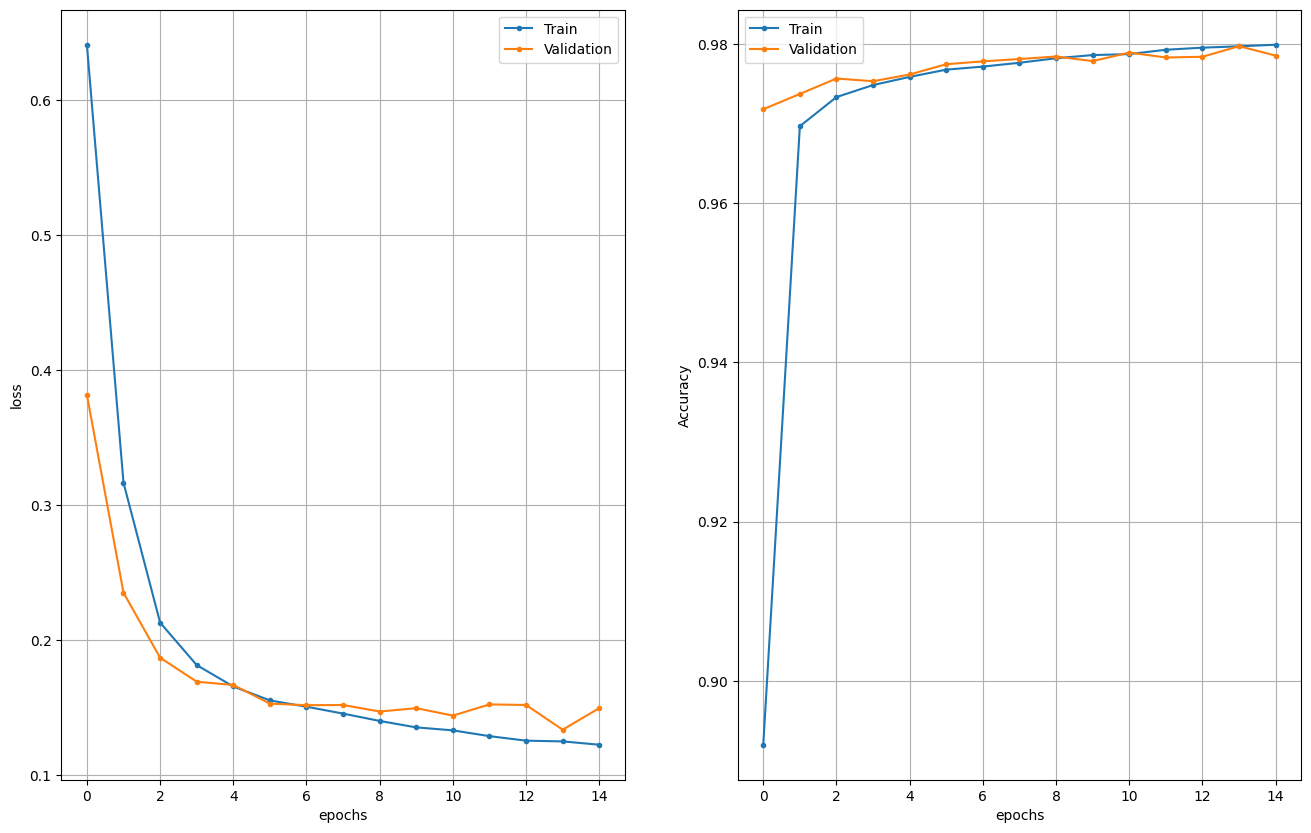

In [9]:
# let's show train and val history parametrs
plt.rcParams['figure.figsize'] = [16, 10]
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, batch_size = batch_size)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

5/5 [==============================] - 0s 41ms/step - loss: 0.1197 - accuracy: 0.9858
Test Loss: 0.1197071298956871
Test Accuracy: 0.9858490228652954


In [11]:
# Get prediction on test data
predictions = model.predict(x_test, batch_size = batch_size)

5/5 [==============================] - 0s 36ms/step


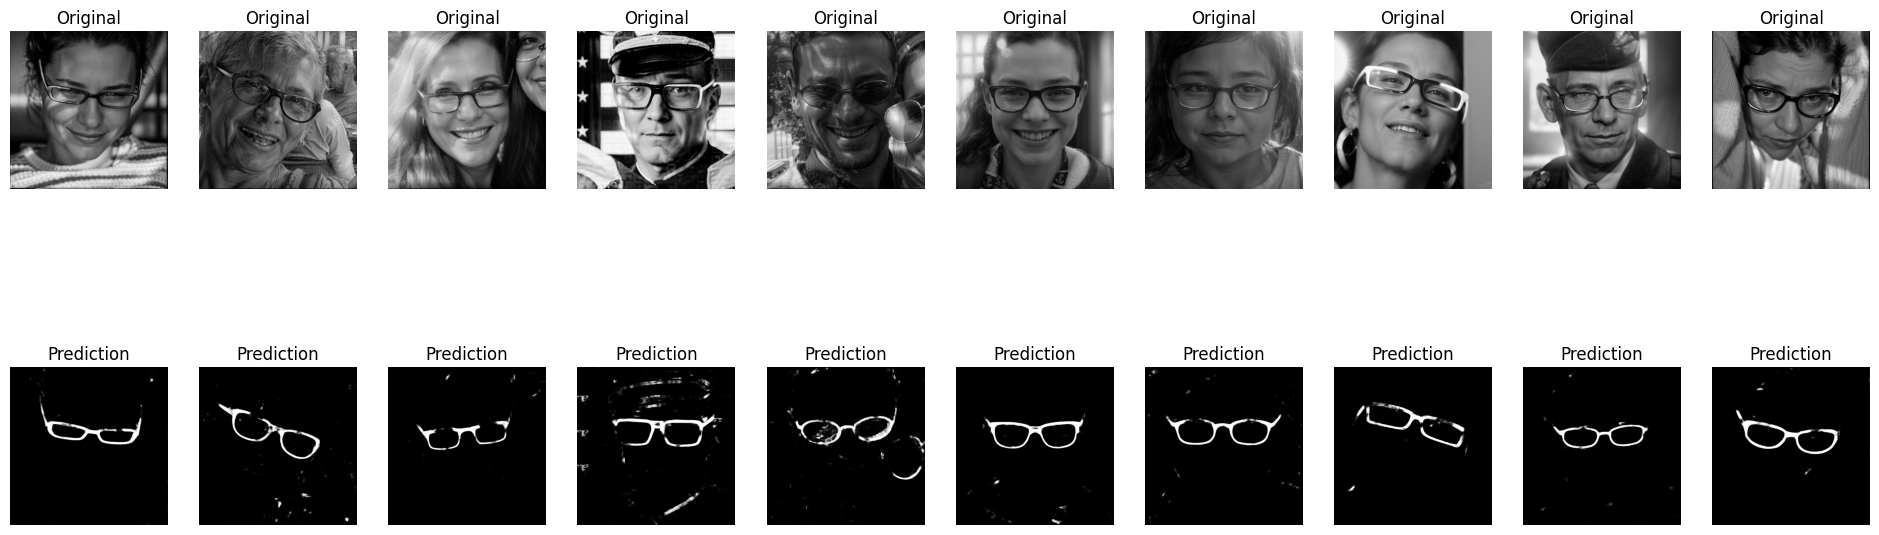

In [18]:

#Function to show original images and prediction masks
def plot_images(images, predictions):
    num_images = len(images)
    plt.figure(figsize=(24, 8))

    for i in range(num_images):
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR)

        plt.subplot(2, num_images, i + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Original')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(predictions[i], cmap='gray')
        plt.axis('off')
        plt.title('Prediction')

    plt.show()

# Let's plot test images and prediction masks
plot_images(x_test, predictions)

In [13]:
# # Load model with users own metrics
# best_model = tf.keras.models.load_model('best_model.keras', custom_objects={'dice_bce_loss': dice_bce_loss})